# Task Description


The current script uses K-Means Clustering to allocate each instance/data row into a different cluster based on the respective data patterns. In a sense, we borrow AI's power to detect any data pattern. Once the cluster is created, it would then become the Target Variable/Dependent Variable of the subsequent Random Forest model. We could then use Features/Independent variables to make cluster prediction via Random Forest, and most importantly, we would be able to use feature important in Random Forest to quantify the influence of respective Features/Independent variables on cluster prediction.

In truth, the unsupervised followed by supervised learning approach might be overkilled as we can simply do Statistical Analysis such as ANOVA or Regression to quantify Data pattern and predictor(s); however, the current method would be ideal for an automated Recommendation system to recommend flight+Hotel package to different customers instead of asking customers to filter packages themselves. 

Lastly, like in Academia, success is usually coupled with failure, and may I ask you to be open-minded for the following ML model implementation. Otherwise, have some coffee and pray that you understand everything that I have written in my script :)






# K-Means Clustering

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [30,30]
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,roc_auc_score,confusion_matrix,auc, roc_curve
from clusteval import clusteval
from pandas.plotting import parallel_coordinates
#from yellowbrick.features import ParallelCoordinates


In [5]:
df1 = pd.read_excel('Data.xlsx')

### The below data exploration allows one to identify any missing value or categorical data needed to be removed/transformed

In [281]:
df1

,row_id,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
0,0,1,1,0.0,1.0,0.0,0,32,140,C,B,40,0,0,0,0,0.00,14382.25
1,1,1,1,0.0,1.0,1.0,0,152,40,C,A,29,1,0,0,0,0.00,9715.59
2,2,1,1,0.0,1.0,0.0,0,17,30,A,B,29,0,1,1,0,0.00,1697.67
3,3,1,1,0.0,1.0,0.0,0,37,70,C,A,41,0,2,2,0,0.00,10897.33
4,4,1,1,0.0,1.0,0.0,0,17,30,A,B,29,2,1,1,0,0.00,1026.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303788,303788,13,1,1.0,0.0,0.0,4,40,70,A,B,15,0,18,39,1,4912.67,20726.78
303789,303789,32,1,NaN,NaN,NaN,5,1,130,A,NaN,5,3,38,38,1,567.25,3497.89
303790,303790,31,1,NaN,NaN,NaN,5,19,50,A,NaN,5,3,38,38,2,1204.48,13226.72
303791,303791,28,1,0.0,1.0,0.0,0,31,20,C,A,41,1,4,4,1,893.17,3361.35


In [383]:
df1.describe()

,row_id,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
count,219313.000000,219313.000000,219313.0,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000,219313.000000
mean,142718.066599,24.293412,1.0,0.081910,0.898798,0.022789,1.745077,70.398663,72.208442,32.754292,1.232216,14.637659,15.359149,0.148094,683.418216,14680.988894
std,88057.079386,11.091397,0.0,0.274229,0.301597,0.149232,1.623954,78.368822,41.851405,17.166008,1.596112,13.607054,14.183938,0.447614,2438.531982,16454.053003
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.690000
25%,58679.000000,16.000000,1.0,0.000000,1.000000,0.000000,0.000000,22.000000,40.000000,15.000000,0.000000,4.000000,4.000000,0.000000,0.000000,3066.560000
50%,142152.000000,25.000000,1.0,0.000000,1.000000,0.000000,1.000000,45.000000,70.000000,39.000000,0.000000,9.000000,10.000000,0.000000,0.000000,9104.000000
75%,218963.000000,33.000000,1.0,0.000000,1.000000,0.000000,4.000000,81.000000,80.000000,40.000000,2.000000,34.000000,34.000000,0.000000,0.000000,20822.210000
max,303792.000000,42.000000,1.0,1.000000,1.000000,1.000000,4.000000,522.000000,340.000000,67.000000,5.000000,38.000000,39.000000,5.000000,43485.370000,295144.430000


In [282]:
df1.isnull().sum()

row_id                   0
search_date              0
stage_1                  0
stage_2              44849
stage_3              44849
stage_4              44849
search_feature_1         0
search_feature_2         0
search_feature_3         0
search_feature_4         0
search_feature_5     45080
product_feature_1        0
product_feature_2        0
product_feature_3        0
product_feature_4        0
product_feature_5        0
product_feature_6    10378
product_feature_7    20719
dtype: int64

### The below function is used for data cleaning such as rename string label to a numerical value, dropping NaN value, and separating categorical and numerical variables into different dataframe.

### It also standardises numerical variables/features within the df_numerical_columns dataframe to minimise distortion carrying into the K-Means Clustering. The df_numerical_columns dataframe is then merged with the df_categorical_columns dataframe ready for K-Means Clustering Model Ingestion.

##### *In hidesight, perhaps K-prototype (k-means for numeric + K-modes for categorical variables) should be used.




In [41]:
def DatePreProcessing(DataFrame):
    df1 = DataFrame.dropna()
    df1 = df1.replace({'A':1,'B':0,'C':0})
    df_numerical_columns = df1.drop(columns = ['search_feature_4','search_feature_5','row_id'])
    df_categorical_columns = df1.iloc[:,9:11]
    scaler = StandardScaler()
    numerical_columns_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_columns))
    numerical_columns_scaled.columns = ['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']

    numerical_columns_scaled.reset_index(drop = True, inplace = True)
    df_categorical_columns.reset_index(drop = True, inplace = True)
    df2 = pd.concat([numerical_columns_scaled,df_categorical_columns],axis=1)
    df2.dropna()


    return df2


In [43]:
DatePreProcessing(df1)


,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7,search_feature_4,search_feature_5
0,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.489975,1.619819,0.422097,-0.772013,-1.075743,-1.082858,-0.330853,-0.280259,-0.018156,0,0
1,-2.100138,0.0,-0.298694,0.335556,6.548294,-1.074587,1.041250,-0.769592,-0.218705,-0.145489,-1.075743,-1.082858,-0.330853,-0.280259,-0.301774,0,1
2,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.681378,-1.008533,-0.218705,-0.772013,-1.002252,-1.012355,-0.330853,-0.280259,-0.789067,1,0
3,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.426174,-0.052769,0.480352,-0.772013,-0.928760,-0.941853,-0.330853,-0.280259,-0.229954,0,1
4,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.681378,-1.008533,-0.218705,0.481035,-1.002252,-1.012355,-0.330853,-0.280259,-0.829843,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219308,0.424347,0.0,-0.298694,0.335556,6.548294,0.156977,2.585235,0.186172,-1.267292,1.107559,-0.855269,-0.871350,1.903218,1.238142,0.174480,0,1
219309,0.334187,0.0,-0.298694,0.335556,-0.152712,-0.458805,-0.132689,0.425114,0.363842,1.107559,-0.414320,1.666738,1.903218,3.768514,0.453649,1,0
219310,-1.018216,0.0,3.347906,-2.980132,-0.152712,1.388542,-0.387893,-0.052769,-1.034273,-0.772013,0.247103,1.666738,1.903218,1.734347,0.367436,1,0
219311,0.334187,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.502735,-1.247475,0.480352,-0.145489,-0.781777,-0.800848,1.903218,0.086016,-0.687956,0,1


### The below Silhouette Score is used to examine how many potential clusters there are within the Data. The Max score of 1 would represent the greatest distance between a particular point within a cluster to a particular point of the other cluster, and the min score is -1. The fact that we have the highest score of 0.29 with 2 clusters would suggest our data is trending towards 2 clusters. 






*Note,0.29 suggests the data has weak Data Pattern/Structure. However, it does not mean it has no structure

In [289]:

for n_cluster in range (2,5):
    clusterer = KMeans(n_clusters = n_cluster, random_state = 1,n_jobs = -1)
    y = clusterer.fit_predict(df2)
    text = "For clusters = {} The average silhoutte_score is:{}"
    output = print(text.format(n_cluster,round(silhouette_score(df2,y, n_jobs = -1),2)))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


For clusters = 2 The average silhoutte_score is:0.29


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


For clusters = 3 The average silhoutte_score is:0.16


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


For clusters = 4 The average silhoutte_score is:0.17



### The below function predict/allocate 2 clusters into the dataframe 'df2' via K-Means Clustering since it was previously seen by the Silhoutte test that our data is trending towards 2 clusters. In addition, a Parallel Coordinates graph is used to assess data pattern as well as data clustering.

In [44]:
def Parallel_Coordinates_K_Means(df2):
    
    clusterer = KMeans(n_clusters = 2, random_state = 1,n_jobs = -1)
    y = clusterer.fit_predict(df2)
    text = "For clusters = {} The average silhoutte_score is:{}"
    text = print(text.format(2,round(silhouette_score(df2,y, n_jobs = -1),2)))
    df2['cluster'] = y
    graph = pd.plotting.parallel_coordinates(df2[['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','search_feature_4','search_feature_5','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']],'stage_2',color=['b','r'],alpha = 0.5)
    return text, graph




### Usually, when examing high-dimensional data, one would use Principle Component Analysis to observe Data Pattern/Clustering. However, this approach disables one to observe which feature belongs to which Principle Component. As such, Parallel Coordinates is used for the current work. For those who are unfamiliar with how it works, please visit the following website: https://eagereyes.org/techniques/parallel-coordinates

### In sum, each line represents each instance of the data. Blue and Red represent the respective clusters allocated by K-Means Clustering Model. Some of the most noticeable findings including there is an exponential positive correlation between product_feature_4 and product_feature_5. More interestingly, there is also a positive correlation between product_feature_1 and product_feature_3 mediated by product_feature_2.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


For clusters = 2 The average silhoutte_score is:0.29


(None, <matplotlib.axes._subplots.AxesSubplot at 0x1a27a63fd0>)

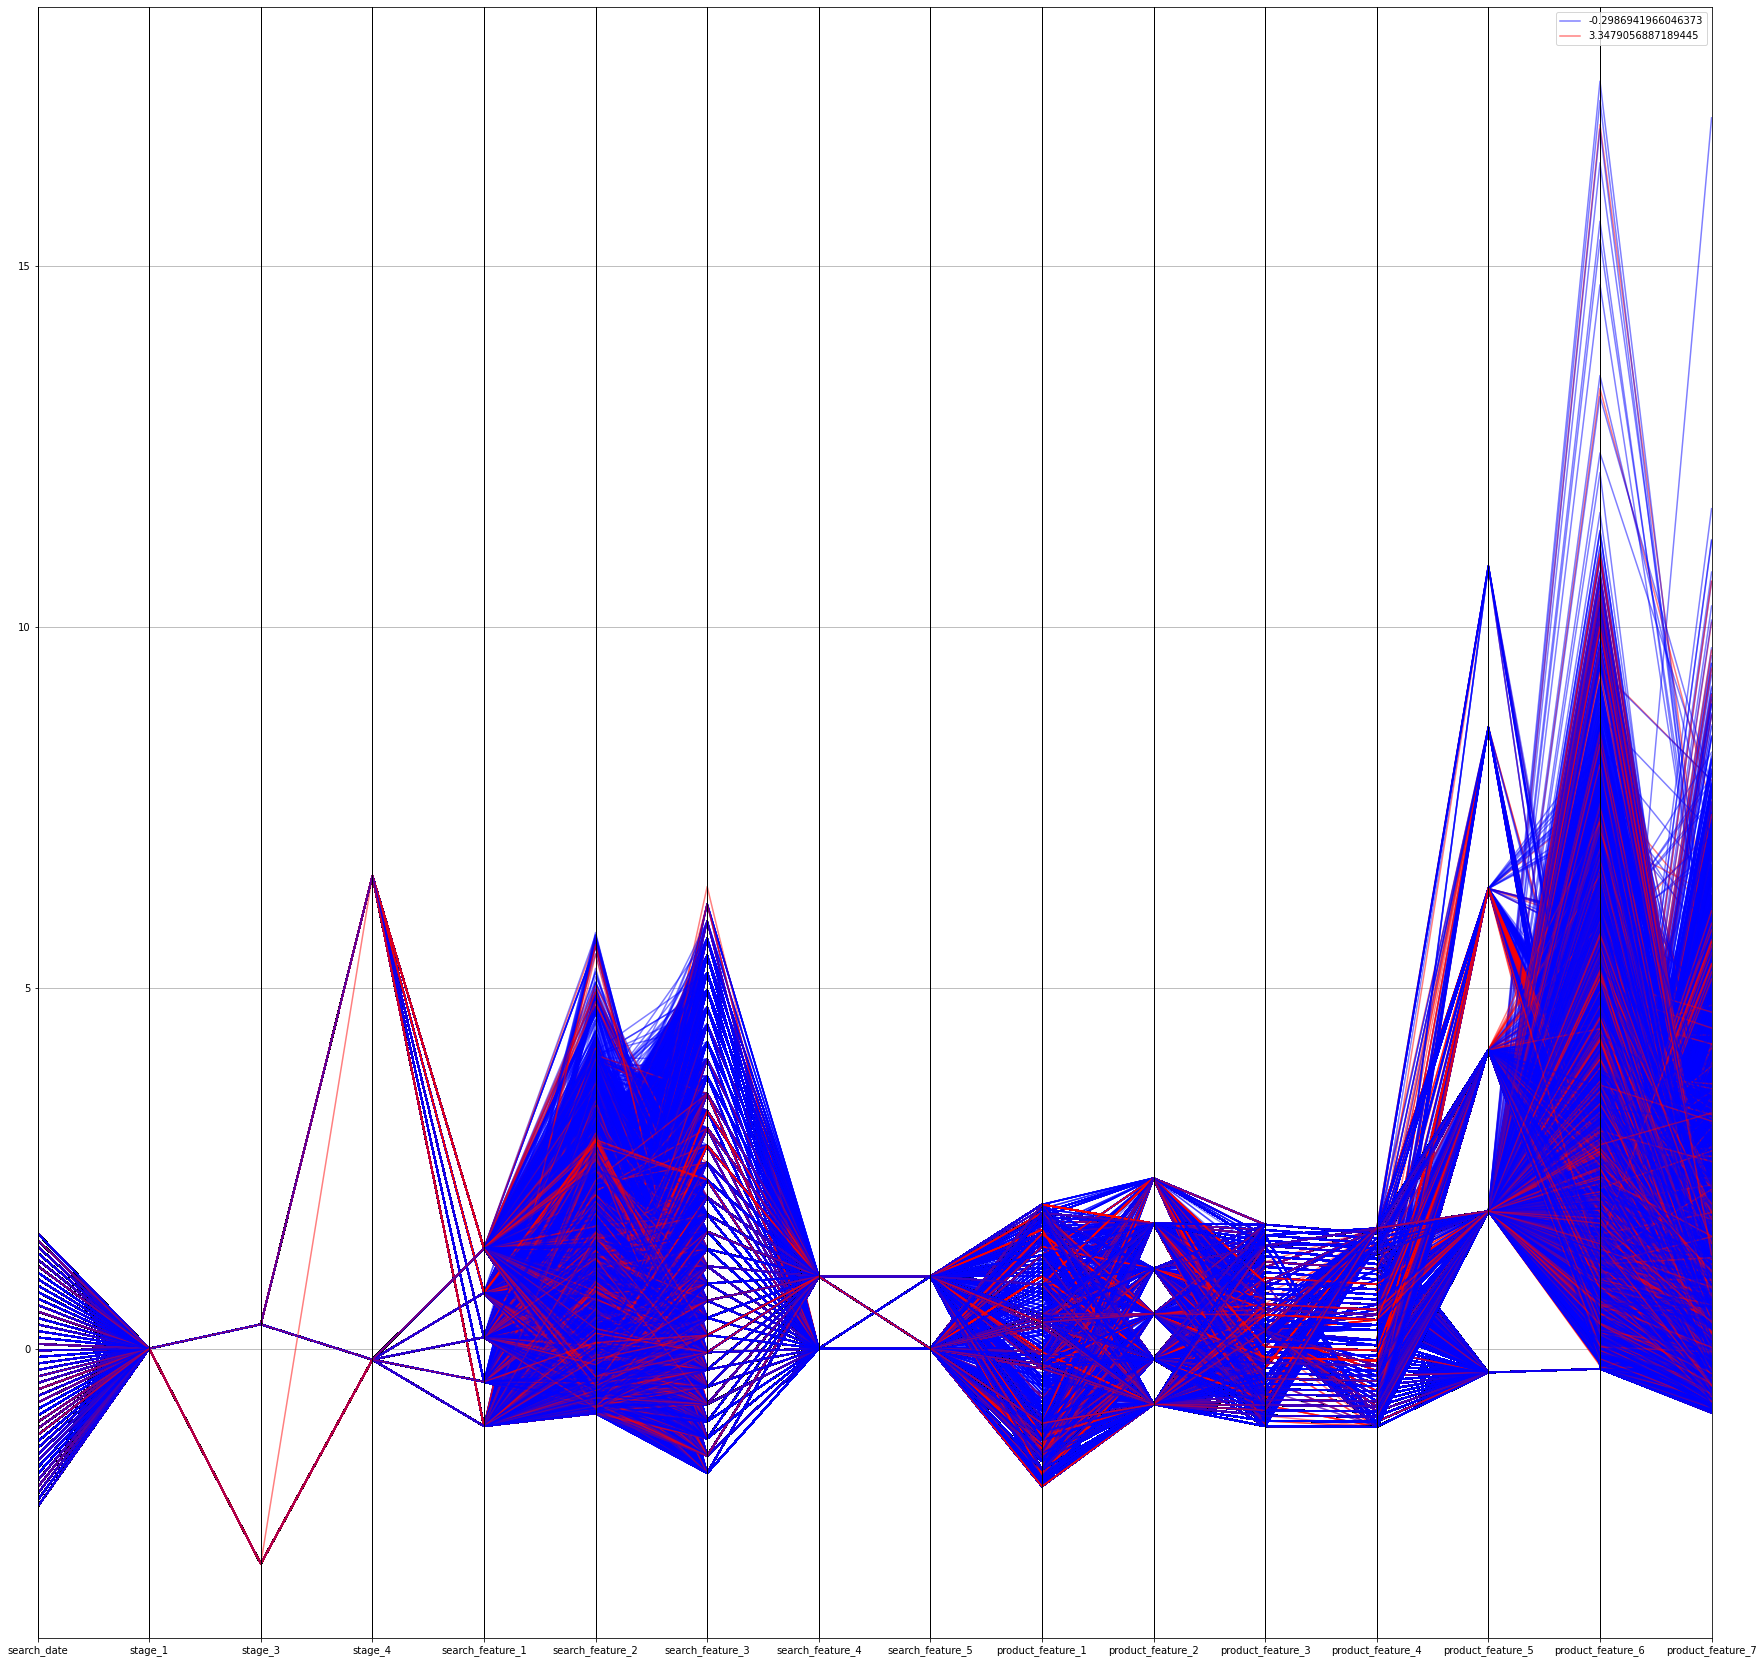

In [45]:
Parallel_Coordinates_K_Means(df2)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE


In [67]:
df2

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7,search_feature_4,search_feature_5,cluster
0,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.489975,1.619819,0.422097,-0.772013,-1.075743,-1.082858,-0.330853,-0.280259,-0.018156,0,0,0
1,-2.100138,0.0,-0.298694,0.335556,6.548294,-1.074587,1.041250,-0.769592,-0.218705,-0.145489,-1.075743,-1.082858,-0.330853,-0.280259,-0.301774,0,1,0
2,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.681378,-1.008533,-0.218705,-0.772013,-1.002252,-1.012355,-0.330853,-0.280259,-0.789067,1,0,0
3,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.426174,-0.052769,0.480352,-0.772013,-0.928760,-0.941853,-0.330853,-0.280259,-0.229954,0,1,0
4,-2.100138,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.681378,-1.008533,-0.218705,0.481035,-1.002252,-1.012355,-0.330853,-0.280259,-0.829843,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219308,0.424347,0.0,-0.298694,0.335556,6.548294,0.156977,2.585235,0.186172,-1.267292,1.107559,-0.855269,-0.871350,1.903218,1.238142,0.174480,0,1,0
219309,0.334187,0.0,-0.298694,0.335556,-0.152712,-0.458805,-0.132689,0.425114,0.363842,1.107559,-0.414320,1.666738,1.903218,3.768514,0.453649,1,0,1
219310,-1.018216,0.0,3.347906,-2.980132,-0.152712,1.388542,-0.387893,-0.052769,-1.034273,-0.772013,0.247103,1.666738,1.903218,1.734347,0.367436,1,0,1
219311,0.334187,0.0,-0.298694,0.335556,-0.152712,-1.074587,-0.502735,-1.247475,0.480352,-0.145489,-0.781777,-0.800848,1.903218,0.086016,-0.687956,0,1,0


In [68]:
def DatePreProcessing1(DataFrame,DataFrame2):
    df1 = DataFrame.dropna()
    df1 = df1.replace({'A':1,'B':0,'C':0})
    df_numerical_columns = df1.drop(columns = ['search_feature_4','search_feature_5','row_id'])
    df_categorical_columns = df1.iloc[:,9:11]
    ##scaler = StandardScaler()
    ##numerical_columns_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_columns))
    df_numerical_columns.columns = ['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']

    df_numerical_columns.reset_index(drop = True, inplace = True)
    df_categorical_columns.reset_index(drop = True, inplace = True)
    df2 = pd.concat([df_numerical_columns,df_categorical_columns,DataFrame2['cluster']],axis=1)
    df2.dropna()
    

    return df2



In [69]:
df3 = DatePreProcessing1(df1,df2)
df3

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7,search_feature_4,search_feature_5,cluster
0,1,1,0.0,1.0,0.0,0,32,140,40,0,0,0,0,0.00,14382.25,0,0,0
1,1,1,0.0,1.0,1.0,0,152,40,29,1,0,0,0,0.00,9715.59,0,1,0
2,1,1,0.0,1.0,0.0,0,17,30,29,0,1,1,0,0.00,1697.67,1,0,0
3,1,1,0.0,1.0,0.0,0,37,70,41,0,2,2,0,0.00,10897.33,0,1,0
4,1,1,0.0,1.0,0.0,0,17,30,29,2,1,1,0,0.00,1026.74,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219308,29,1,0.0,1.0,1.0,2,273,80,11,3,3,3,1,3702.66,17551.89,0,1,0
219309,28,1,0.0,1.0,0.0,1,60,90,39,3,9,39,1,9873.04,22145.33,1,0,1
219310,13,1,1.0,0.0,0.0,4,40,70,15,0,18,39,1,4912.67,20726.78,1,0,1
219311,28,1,0.0,1.0,0.0,0,31,20,41,1,4,4,1,893.17,3361.35,0,1,0


In [ ]:
### Data Exploration

In [70]:
X_Independent = df3[['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','search_feature_4','search_feature_5','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']].iloc[:,0:17]
X_Independent



,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_5,product_feature_6,product_feature_7
0,1,1,0.0,1.0,0.0,0,32,140,0,0,40,0,0,0,0,0.00,14382.25
1,1,1,0.0,1.0,1.0,0,152,40,0,1,29,1,0,0,0,0.00,9715.59
2,1,1,0.0,1.0,0.0,0,17,30,1,0,29,0,1,1,0,0.00,1697.67
3,1,1,0.0,1.0,0.0,0,37,70,0,1,41,0,2,2,0,0.00,10897.33
4,1,1,0.0,1.0,0.0,0,17,30,1,0,29,2,1,1,0,0.00,1026.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219308,29,1,0.0,1.0,1.0,2,273,80,0,1,11,3,3,3,1,3702.66,17551.89
219309,28,1,0.0,1.0,0.0,1,60,90,1,0,39,3,9,39,1,9873.04,22145.33
219310,13,1,1.0,0.0,0.0,4,40,70,1,0,15,0,18,39,1,4912.67,20726.78
219311,28,1,0.0,1.0,0.0,0,31,20,0,1,41,1,4,4,1,893.17,3361.35


### Check the Target Variable label number between 2 clusters

In [71]:
y_dependent = df3['cluster']
cluster1 = y_dependent.where(y_dependent == 1).count()
cluster0 = y_dependent.where(y_dependent == 0).count()
print (cluster1, cluster0)

31947 187366



### The below function mainly equalises the number in each cluster amongst the training dataset to ensure the subsequent Random Forest would not allocate cluster (Target Variable) to the new data based on the greater number of a particular cluster label. With a similar aim, it removes any rows duplicates. In addition, it split Training and Testing Data

In [91]:

df3 = df3.drop_duplicates()
X_Independent = X_Independent = df3[['search_date','stage_1','stage_2','stage_3','stage_4','search_feature_1','search_feature_2','search_feature_3','search_feature_4','search_feature_5','product_feature_1','product_feature_2','product_feature_3','product_feature_4','product_feature_5','product_feature_6','product_feature_7']].iloc[:,0:17]

y_dependent = df3['cluster']
X_train, X_test, y_train, y_test = train_test_split(X_Independent, y_dependent, test_size = 0.2, random_state = 0)
smote = SMOTE(sampling_strategy ='minority') # Synthetic Minority Over-Sampling Technique
X_sm, y_sm = smote.fit_sample(X_train,y_train)
Cluster_sample_size = y_sm.groupby(y_sm).count()



In [113]:
print(y_sm.where(y_sm== 1).count(),y_sm.where(y_sm== 0).count())


144655 144655


In [103]:
print(df3['cluster'].where(df3['cluster'] == 1).count(),df3['cluster'].where(df3['cluster'] == 0).count())

31579 180931


### The below uses grid search to find the best parameter within the Random Forest Model. The accuracy of using Testing Data within the Training Data (internal cross-validation) in GridSearch yields an accuracy of 99.94% clustering accuracy. We should discuss why we obtain such a high performance later on.

In [94]:
clf = RandomForestClassifier()
tuned_parameters = {'max_features':[0.1,0.3,0.6,0.9], 'n_estimators':[40,50,60,70]}
grid_clf_acc = GridSearchCV(clf, param_grid = tuned_parameters)
grid_clf_acc.fit(X_sm, y_sm)
print('Grid Best Parameter (max.accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy):', grid_clf_acc.best_score_)

Grid Best Parameter (max.accuracy):  {'max_features': 0.6, 'n_estimators': 50}
Grid best score (accuracy): 0.9990356365144655



### The below implemented the optimal parameters (defined by the above gridsearch) on the Testing Data and we have yielded an accuracy of 99.93%. Again, we're going to go through why we have such a high ML performance with Testing Data. Otherwise, Feature important has shown that the 3rd last columns within the DataFrame, 'Product_Feature_5' is the most influential predictor in predicting Clustering Prediction with a score of 0.3301764

In [95]:

RF_predicted = RandomForestClassifier(max_features = 0.6, n_estimators = 50,random_state= 0).fit(X_train, y_train) # from 0.9 to 0.1

RF_predicted_score = RF_predicted.score(X_test, y_test)
print('Accuracy score on Testing Data', RF_predicted_score)
print ('Feature important:', RF_predicted.feature_importances_)

Accuracy score on Testing Data 0.9989412262952332
Feature important: [9.52234472e-04 0.00000000e+00 2.31092770e-01 8.11234528e-02
 1.03814617e-03 2.15030336e-03 1.83807031e-03 3.21363367e-03
 6.88232499e-04 1.28054331e-04 8.88454673e-04 7.76901705e-04
 1.21640252e-03 1.90598878e-03 3.46267239e-01 3.12677383e-01
 1.40427327e-02]


### The below illustrates both the AUC score and ROC curve. In sum, the higher the score/ the more top left the green curve, the greater the True Positive rate paired with lesser the False Positive Rate in clustering prediction made by the Random Forest.

In [96]:
y_score_RF = RF_predicted.predict_proba(X_test)
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF[:,1])
roc_auc_RF = auc(fpr_RF, tpr_RF)
print('AUC score:', roc_auc_RF)

AUC score: 0.9999913063451116


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


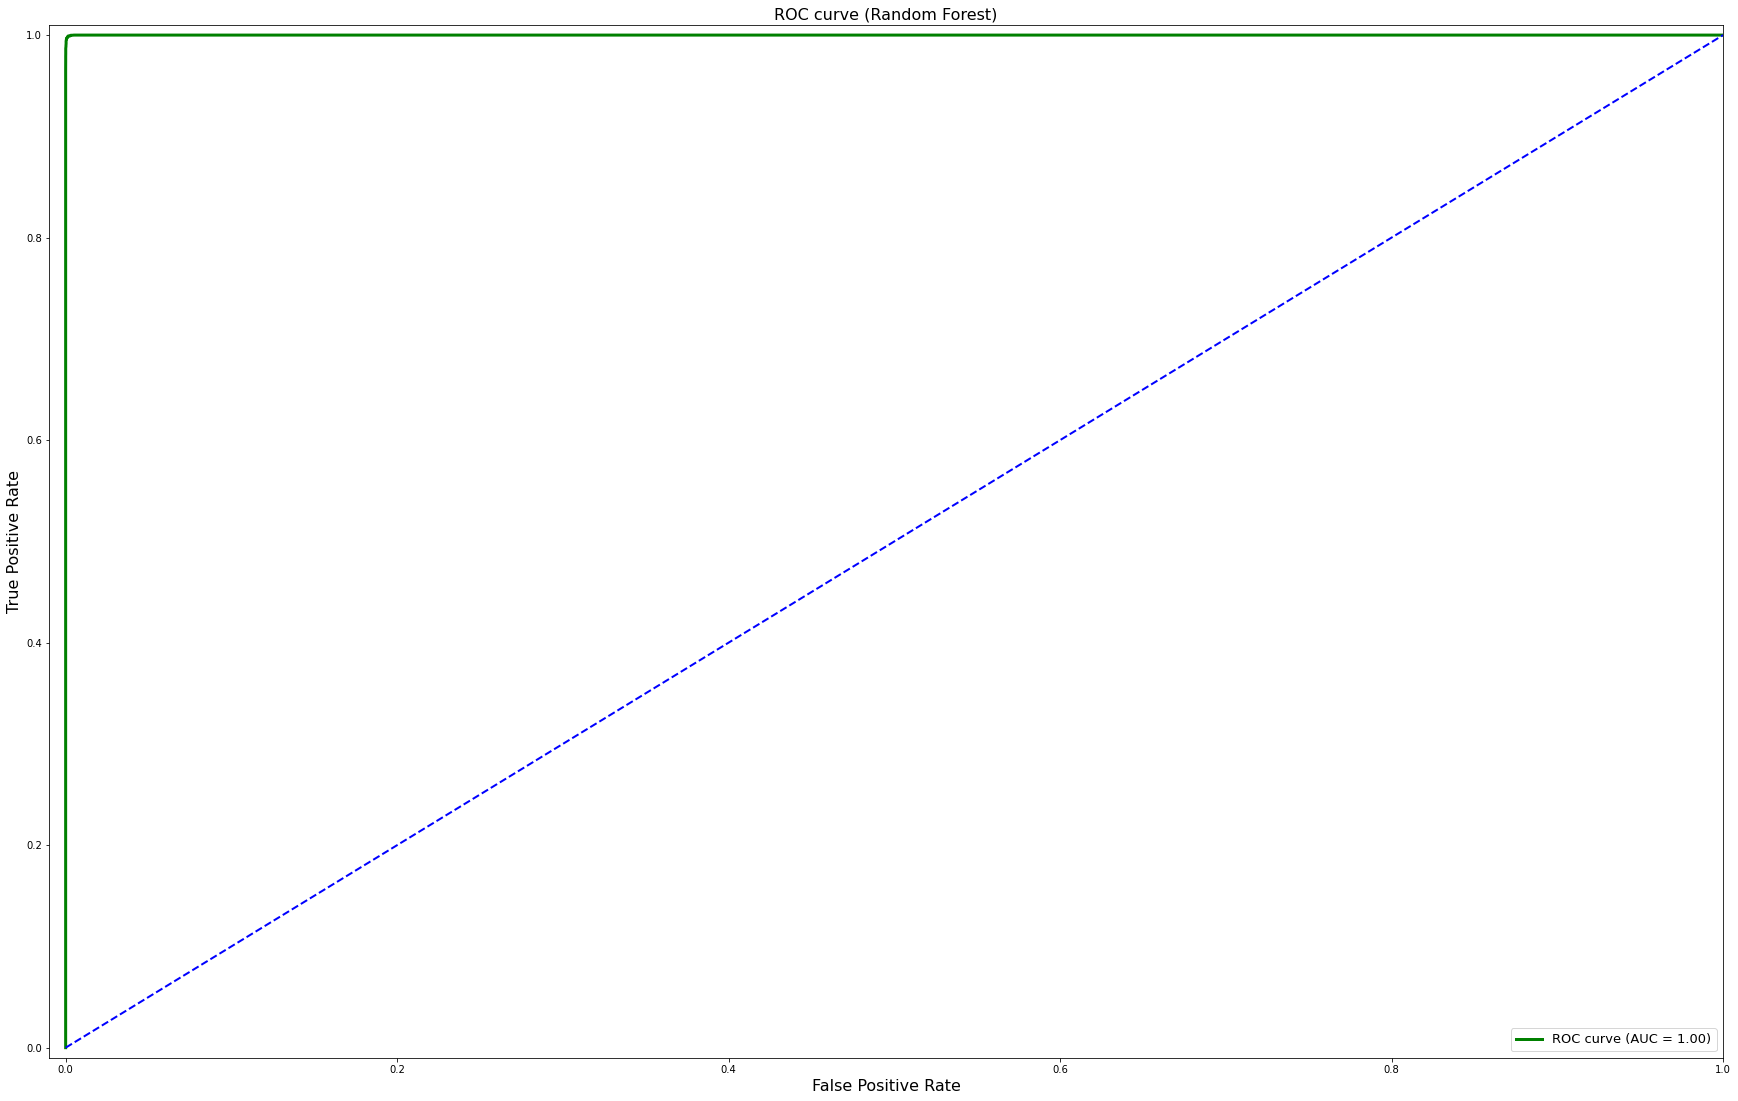

In [97]:
fig = plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
fig.set_figheight(19)
plt.plot(fpr_RF, tpr_RF, lw=3, color = 'green', label='ROC curve (AUC = {:0.2f})'.format(roc_auc_RF))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Random Forest)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], color='blue', lw=2, linestyle='--')
plt.axes().set_aspect('auto')
plt.show()

### The Below is a little investigation onto why our Random Forest has a high Accuracy on both the Testing and Training Data. As demonstrated below, a score of 0 in product_feature_5, has 182671 records in training data and 37626 records in testing data. This hints that the Random Forest Model might use the data of 0 to determine whether data is allocated to cluster 1 or cluster 2. 

### Alternatively, there might be Data Leakage during the training phase of the Random Forest Model. 


In [98]:
X_sm.groupby(['product_feature_5']).count()

,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_6,product_feature_7
product_feature_5,,,,,,,,,,,,,,,,
0,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671,182671
1,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715,83715
2,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129,22129
3,629,629,629,629,629,629,629,629,629,629,629,629,629,629,629,629
4,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
5,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [101]:
X_test.groupby(['product_feature_5']).count()


,search_date,stage_1,stage_2,stage_3,stage_4,search_feature_1,search_feature_2,search_feature_3,search_feature_4,search_feature_5,product_feature_1,product_feature_2,product_feature_3,product_feature_4,product_feature_6,product_feature_7
product_feature_5,,,,,,,,,,,,,,,,
0,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672,37672
1,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377,3377
2,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404
3,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
4,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3



### The below function would read any future new data, and make cluster prediction based on the previous Trained Random Forest 

In [398]:
def Input_file_to_predict('xxx.xlsx'):
    Test_df = pd.read_excel('xxx.xlsx')
    Test_df.fillna(Test_df.median(), inplace = True)
    RF_predicted = RandomForestClassifier(max_features = 0.3, n_estimators = 40,random_state= 0).fit(X_train, y_train) # from 0.9 to 0.1
    Test_df['Target_Label'] = RF_predicted.predict(Test_df)
    Final_Output = pd.DataFrame(Test_df) 
    return Final_Output

FileNotFoundError: [Errno 2] No such file or directory: 'xxx.xlsx'